In [1]:
import numpy as np
from numpy import array
import math
import cv2 as cv2
import matplotlib.pyplot as plt

10. (5 баллов) Шахматная доска 8х8 клеток имеет длину клетки 0.2. Начало мировой системы координат находится в левом нижнем углу, оси X и Y направлены вдоль сторон клеток, ось Z перпендикулярна плоскости доски. Используя внутренние параметры и положение камеры относительно мировой системы координат из задачи 6 (второе домашнее задание), и предполагая отсутствие дисторсии, найти координаты проекций углов клеток на плоскость изображения. Решить задачу PnP, используя функцию cv2.solvePnPGeneric, для трехмерных координат клеток в мировой системе координат и найденных двумерных проекций. Сравнить полученные поворот и трансляцию с взятыми из задачи 6. Если результаты получаются неожиданными, объяснить.

In [2]:
def get_projection_matrix(alpha):
    Radians_alpha = math.radians(alpha)
    cos_alpha = math.cos(Radians_alpha)
    sin_alpha = math.sin(Radians_alpha)
    K = np.array([[400, 0, 960], [0, 400, 540], [0, 0, 1]])
    R_T = np.array(
        [[cos_alpha, -sin_alpha, 0, 0], [sin_alpha, cos_alpha, 0, 0], [0, 0, 1, 10]]
    )

    return K @ R_T

def get_coords(x, y, z):
    projection_matrix = get_projection_matrix(45)
    coords = np.array([x, y, z, 1])
    new_coords = projection_matrix @ coords.T
    new_coords = new_coords / new_coords[-1]
    new_coords = new_coords[:-1]
    return int(new_coords[0]), int(new_coords[1])

A = np.zeros((9, 9, 3))  # матрица координат углов
for i in range(9):
    for j in range(9):
        A[i][j][0] = j * 0.2
        A[i][j][1] = (8 - i) * 0.2
        A[i][j][2] = 0

B = np.zeros((9, 9, 2))  # матрица проекции
for i in range(9):
    for j in range(9):
        u, v = get_coords(*(A[i][j]))
        B[i][j][0] = u
        B[i][j][1] = v

In [3]:
C = A.reshape(81, 3)
D = B.reshape(81, 2)
K = np.array([[400, 0, 960], [0, 400, 540], [0, 0, 1]])
a, b, c, d = cv2.solvePnPGeneric(C, D, K, 0)
p, _ = cv2.Rodrigues(np.array(b))

print(f'Матрица поворота:\n', p)
print(f'Трансляция:\n', np.around(c))

Матрица поворота:
 [[ 0.70645149 -0.70750539 -0.01903727]
 [ 0.70770879  0.70581516  0.03119651]
 [-0.00863491 -0.03551166  0.99933196]]
Трансляция:
 [[[-0.]
  [-0.]
  [10.]]]


12. (5 баллов) Используя матрицу внутренних параметров https://drive.google.com/file/d/1A4H84PLy7971Xd1ErS1bRRupWk9_TCYI/view?usp=sharing, запустить функцию cv2.undistort() на изображении https://drive.google.com/file/d/1mC0PI9k4q_wJt9iAn6uosEVSJb9PcZIk/view?usp=sharing, и записать в файл изображение с компенсацией искажений линзы.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
img = cv2.imread(r'/content/drive/My Drive/Colab Notebooks/GOPR01170000.jpg')
options  = cv2.FileStorage(r'/content/drive/My Drive/Colab Notebooks/camera.xml', cv2.FILE_STORAGE_READ)
K = options.getNode('camera_matrix').mat()
dist = options.getNode('distortion_coefficients').mat()
result = cv2.undistort(img, K, dist, None, K)
cv2.imwrite('result.jpg', result)

True

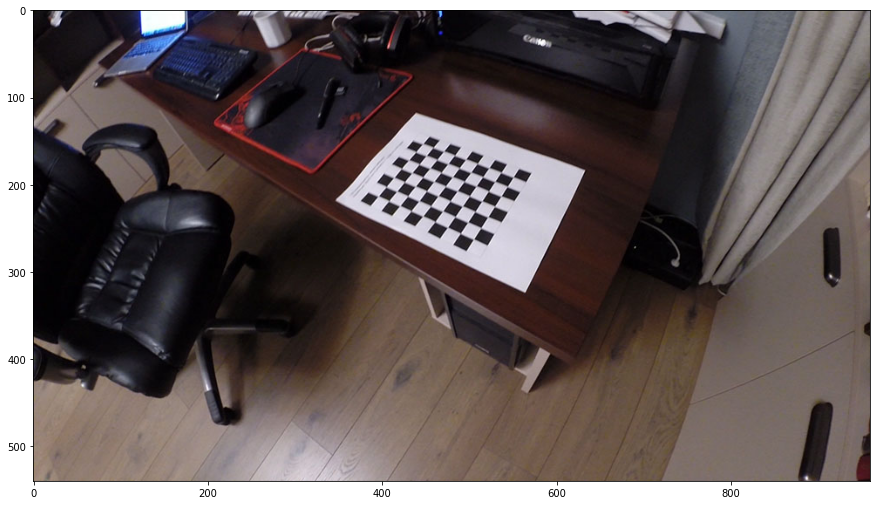

In [6]:
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

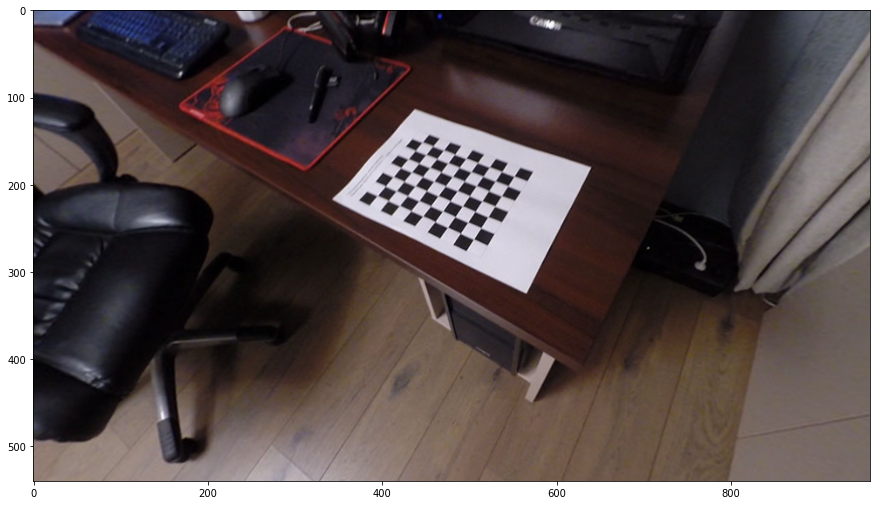

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))